In [1]:
import os
import pandas as pd
from PIL import Image
import numpy as np
# Define paths
main_path = r'EEG SENCE'
eeg_graph_data_path = r'EEG SENCE\EEG Graph new data'
mri_data_path = r'EEG SENCE\MRI EEG'
history_data_path = r'EEG SENCE\history.csv'

## EEG DATA

In [2]:
main_dir = r"EEG SENCE\EEG Graph new data"
positive_data_dir = os.path.join(main_dir, "Positive_Data")
negative_data_dir = os.path.join(main_dir, "Negative_Data")

In [3]:
def load_images_from_folder(folder_path):
    images = []
    for person_folder in sorted(os.listdir(folder_path)):
        person_images = []
        person_folder_path = os.path.join(folder_path, person_folder)
        for image_file in sorted(os.listdir(person_folder_path)):
            image_path = os.path.join(person_folder_path, image_file)
            # Load image using PIL (Python Imaging Library)
            img = Image.open(image_path)
            # Preprocess image (resize, normalize, etc.)
            # Example: Resize image to desired dimensions (e.g., 224x224)
            img = img.resize((224, 224))
            # Convert image to numpy array and normalize pixel values
            img_array = np.array(img) / 255.0
            person_images.append(img_array)
        images.append(person_images)
    return np.array(images)

In [4]:
positive_data = load_images_from_folder(positive_data_dir)

In [5]:
positive_data.shape

(14, 20, 224, 224, 3)

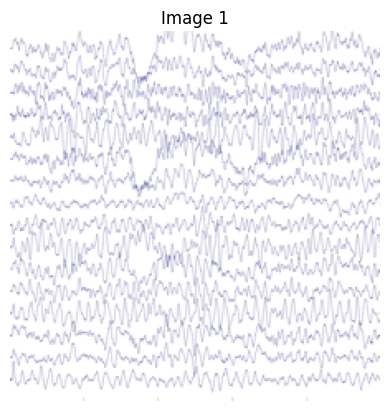

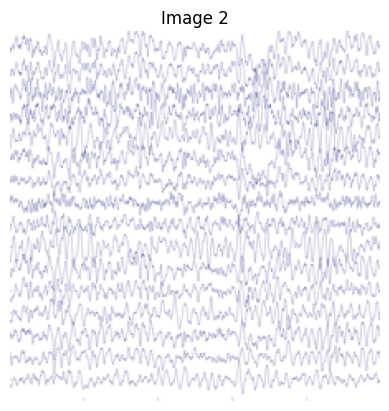

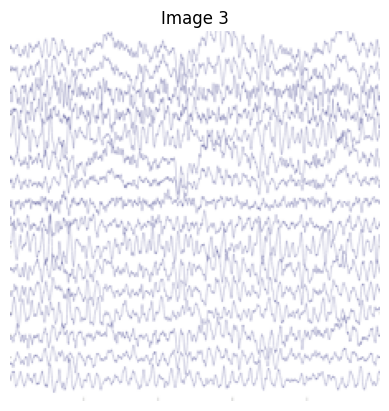

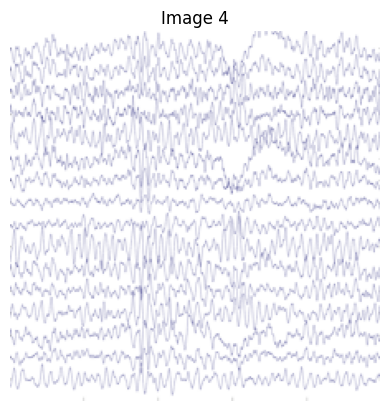

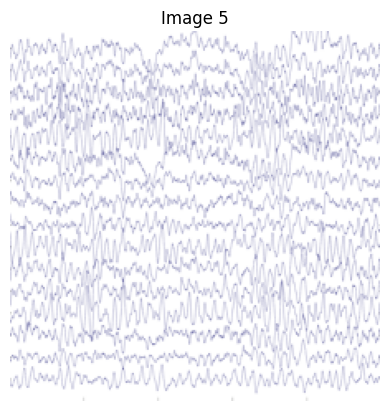

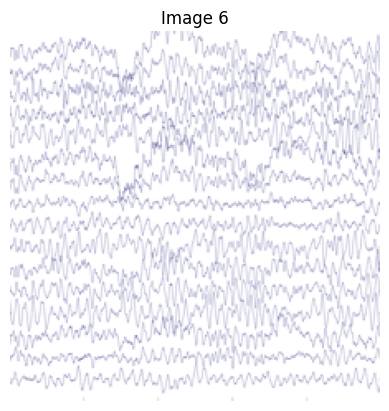

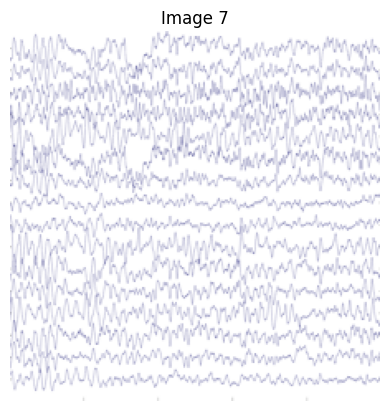

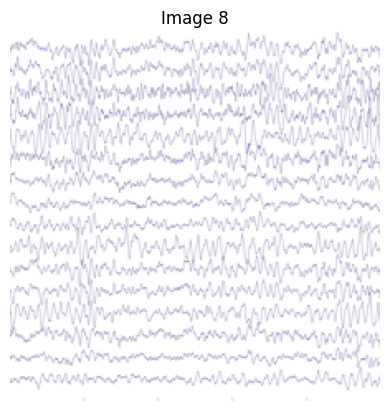

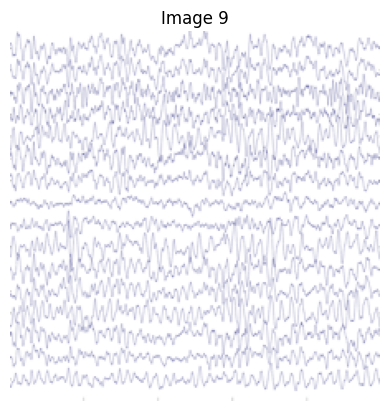

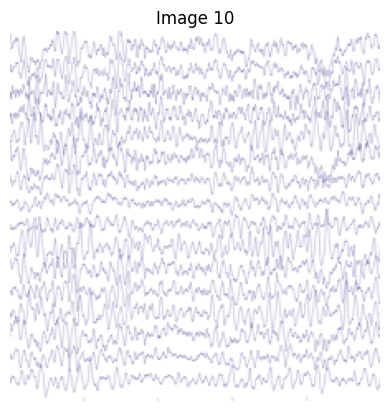

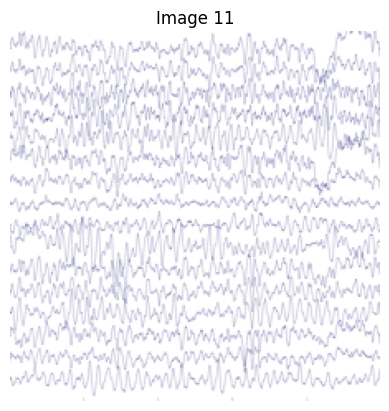

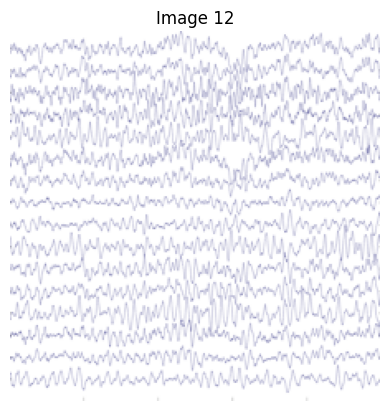

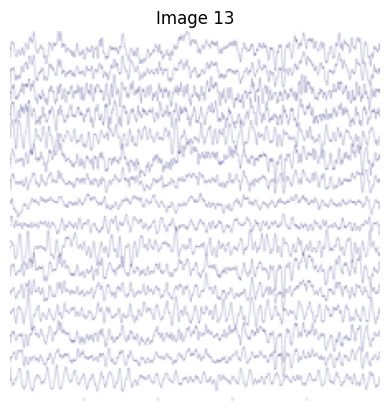

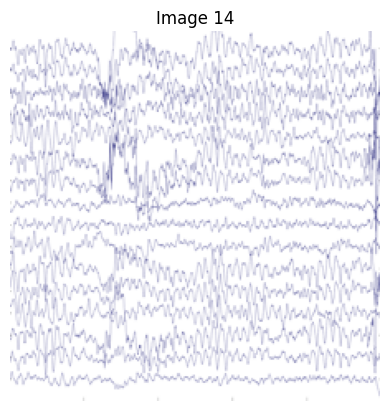

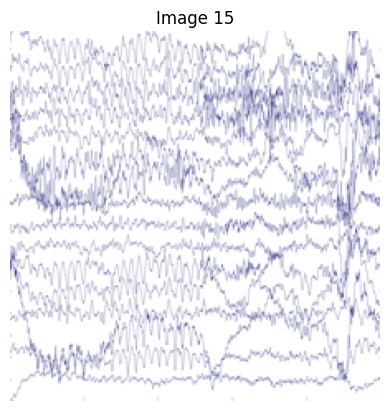

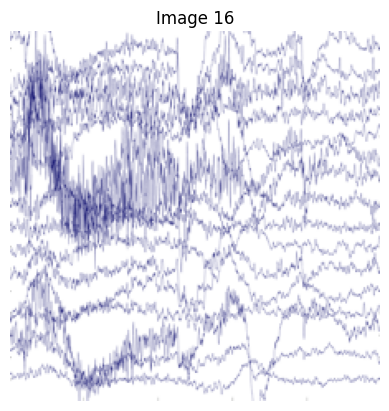

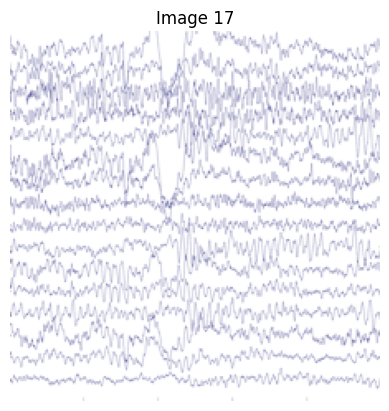

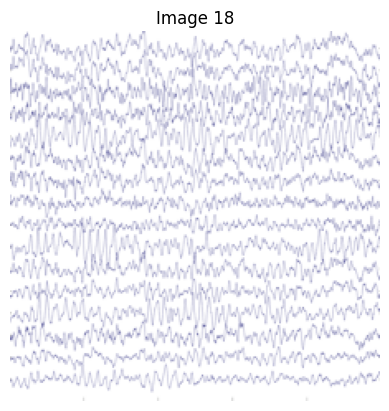

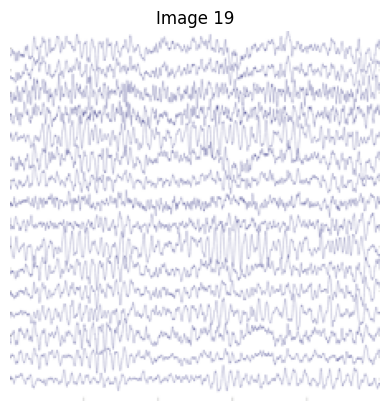

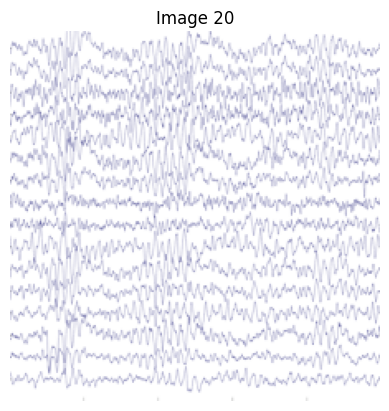

In [6]:
import matplotlib.pyplot as plt
person_1_images = positive_data[0]  # Accessing images for person 1 (index 0)
# Iterate over each image and display it
for i, image in enumerate(person_1_images):
    plt.imshow(image)
    plt.title(f"Image {i+1}")
    plt.axis('off')
    plt.show()

In [7]:
negative_data = load_images_from_folder(negative_data_dir)

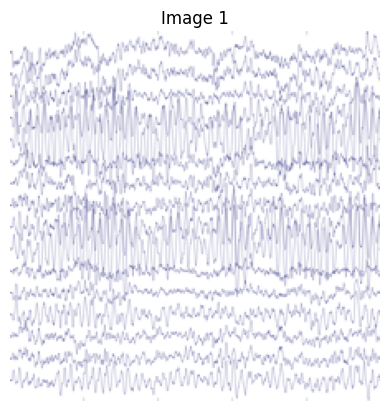

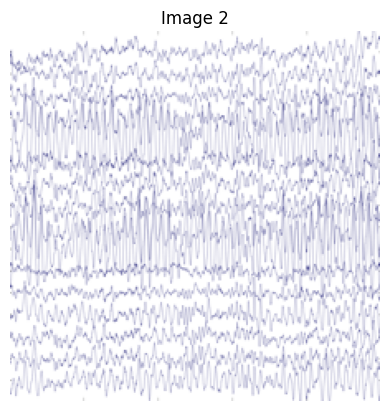

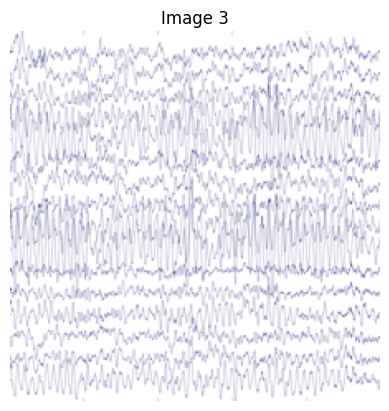

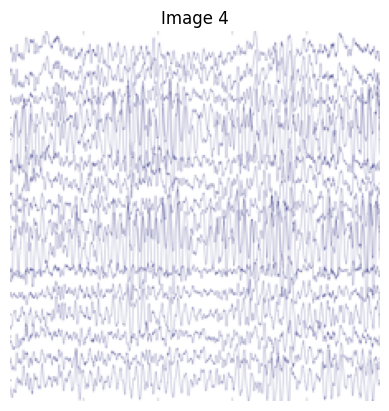

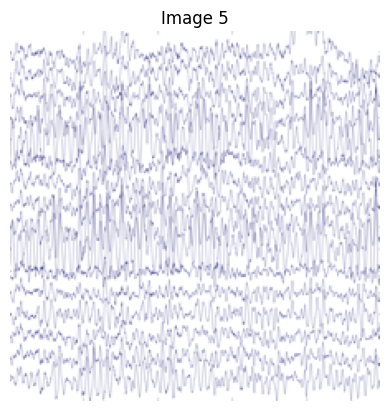

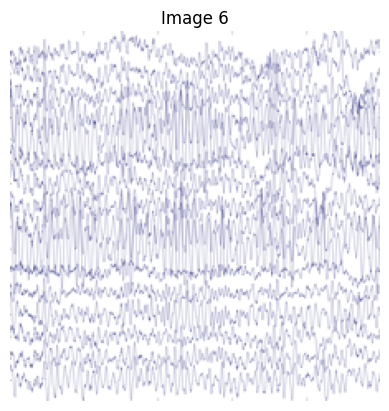

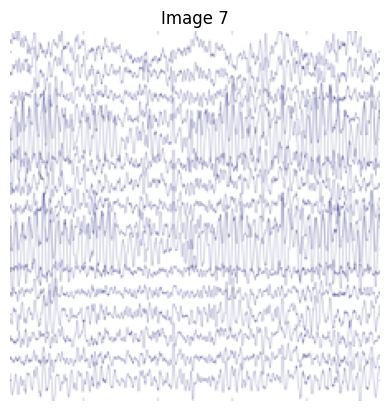

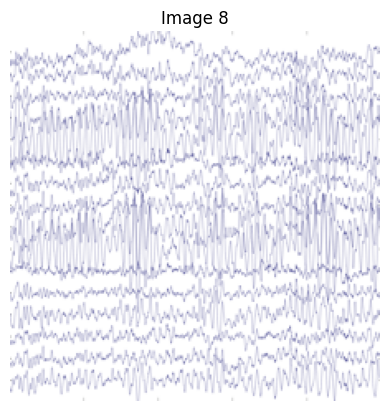

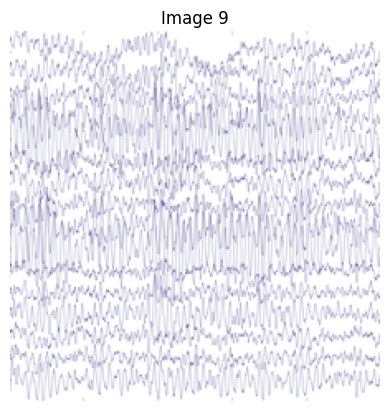

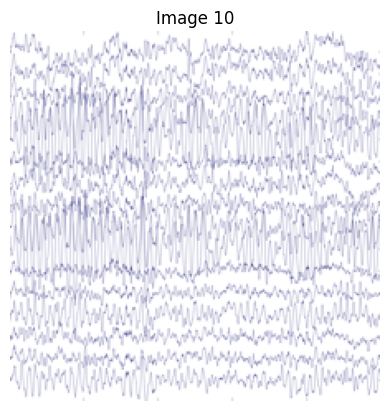

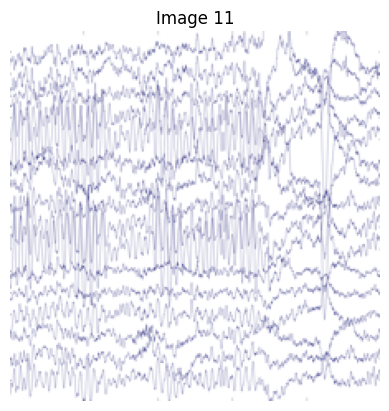

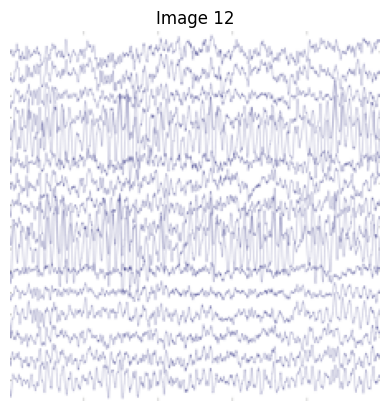

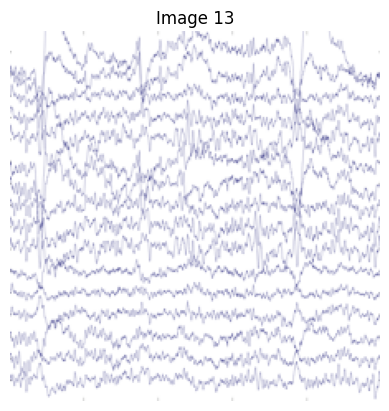

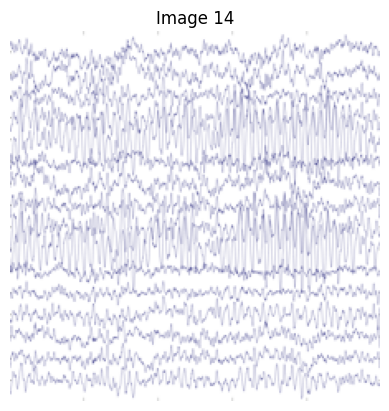

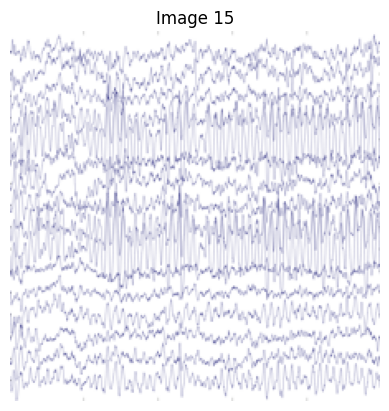

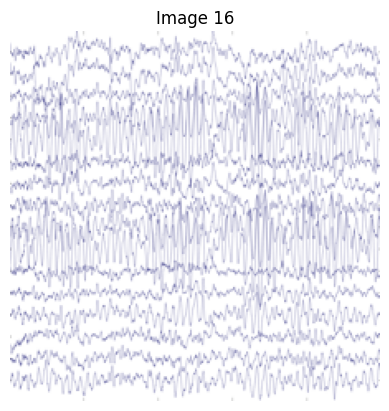

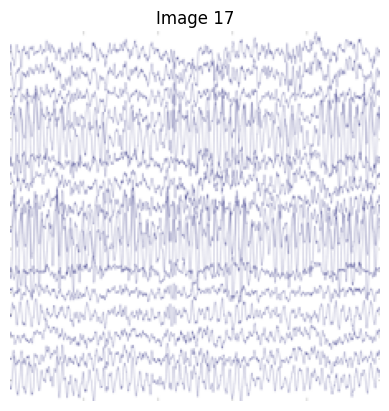

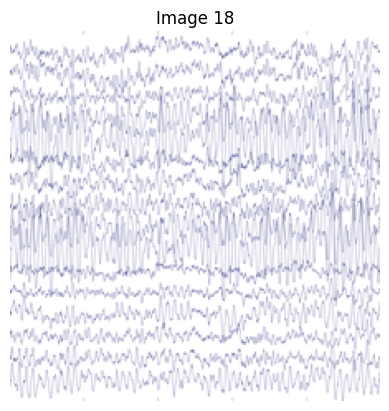

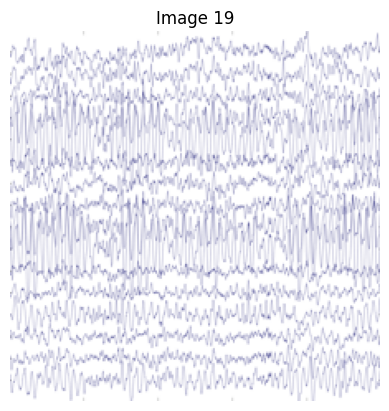

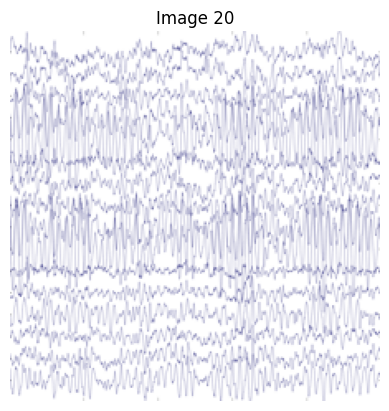

In [8]:
import matplotlib.pyplot as plt
person_1_images = negative_data[0]  # Accessing images for person 1 (index 0)
# Iterate over each image and display it
for i, image in enumerate(person_1_images):
    plt.imshow(image)
    plt.title(f"Image {i+1}")
    plt.axis('off')
    plt.show()


# MRI

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to load MRI images from folder
def load_images_from_folder(folder_path):
    images = []
    for image_file in sorted(os.listdir(folder_path)):
        image_path = os.path.join(folder_path, image_file)
        if image_path.endswith(".jpg"):  # Check if file is a JPEG image
            # Load image using PIL (Python Imaging Library)
            img = Image.open(image_path)
            # Preprocess image (resize, normalize, etc.)
            img = img.resize((224, 224))  # Resize image to desired dimensions
            img_array = np.array(img) / 255.0  # Normalize pixel values
            images.append(img_array)
    return np.array(images)

# Define directory paths for positive and negative MRI images
positive_mri_dir = r"EEG SENCE\MRI EEG\Positive"
negative_mri_dir = r"EEG SENCE\MRI EEG\Negative"

# Load MRI images for positive cases
positive_mri_data = load_images_from_folder(positive_mri_dir)

# Load MRI images for negative cases
negative_mri_data = load_images_from_folder(negative_mri_dir)



In [11]:
positive_mri_data.shape

(10, 224, 224, 3)

In [12]:
negative_mri_data.shape

(10, 224, 224, 3)

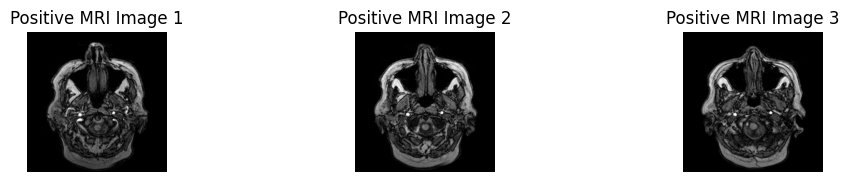

In [13]:
# Example plot of MRI images
plt.figure(figsize=(12, 4))

# Plot positive MRI images
for i in range(min(3, positive_mri_data.shape[0])):
    plt.subplot(2, 3, i+1)
    plt.imshow(positive_mri_data[i], cmap='gray')
    plt.title(f'Positive MRI Image {i+1}')
    plt.axis('off')



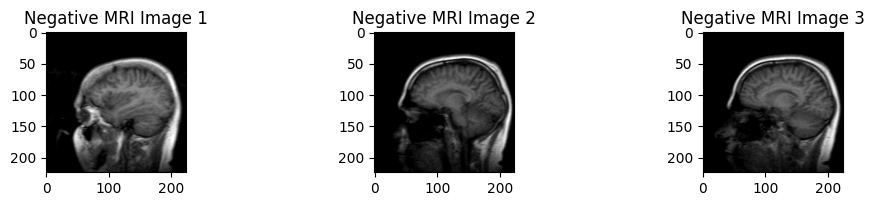

In [14]:
# Example plot of MRI images
plt.figure(figsize=(12, 4))

# Plot negative MRI images
for i in range(min(3, negative_mri_data.shape[0])):
    plt.subplot(2, 3, i+4)
    plt.imshow(negative_mri_data[i], cmap='gray')
    plt.title(f'Negative MRI Image {i+1}')

# History

In [16]:
import pandas as pd
history = pd.read_csv(r'EEG SENCE\history.csv')

In [17]:
history.head()

age  gender family_history     seizure_triggers seizure_type  \
0   35    Male             No               Stress        Focal   
1   42  Female            Yes        Lack of sleep        Focal   
2   28    Male             No  Specific activities        Focal   
3   50  Female             No               Stress  Generalized   
4   38    Male            Yes  Specific activities        Focal   

   seizure_frequency eeg_features    mri_findings  \
0                0.5       Normal          Normal   
1                0.8     Abnormal  Lesion present   
2                0.2       Normal          Normal   
3                0.3     Abnormal          Normal   
4                0.6     Abnormal  Lesion present   

  neuropsychological_assessment medication_adherence comorbidities  \
0                        Normal                 High    Depression   
1                      Abnormal               Medium       Anxiety   
2                        Normal                  Low           NaN   
3                      Abnormal                 High  Hypertension   
4                        Normal               Medium       Anxiety   

  environmental_factors   seizure  
0                Normal  Negative  
1                Normal  Negative  
2                  Poor  Negative  
3                Normal  Negative  
4                Normal  Negative

In [18]:
history.isnull().sum()

age                              0
gender                           0
family_history                   0
seizure_triggers                 0
seizure_type                     0
seizure_frequency                0
eeg_features                     0
mri_findings                     0
neuropsychological_assessment    0
medication_adherence             0
comorbidities                    8
environmental_factors            0
seizure                          0
dtype: int64

In [19]:
# Drop multiple columns from DataFrame 'history'
columns_to_drop = ['seizure_type', 'seizure_frequency', 'eeg_features', 'mri_findings', 'comorbidities', 'environmental_factors']
history.drop(columns_to_drop, axis=1, inplace=True)

In [20]:
history.head()


age  gender family_history     seizure_triggers  \
0   35    Male             No               Stress   
1   42  Female            Yes        Lack of sleep   
2   28    Male             No  Specific activities   
3   50  Female             No               Stress   
4   38    Male            Yes  Specific activities   

  neuropsychological_assessment medication_adherence   seizure  
0                        Normal                 High  Negative  
1                      Abnormal               Medium  Negative  
2                        Normal                  Low  Negative  
3                      Abnormal                 High  Negative  
4                        Normal               Medium  Negative

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'history' is the DataFrame containing the data
# Separate label ('seizure') from the data
label = history['seizure']
data = history.drop('seizure', axis=1)


In [22]:
# Preprocess data
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(label)  # Encode labels (Negative: 0, Positive: 1)

In [23]:
# Encode categorical variables in the data
data['gender'] = label_encoder.fit_transform(data['gender'])  # Encode gender (Male: 1, Female: 0)
data['family_history'] = label_encoder.fit_transform(data['family_history'])  # Encode family history (Yes: 1, No: 0)
data['seizure_triggers'] = label_encoder.fit_transform(data['seizure_triggers']) #seizure_trigger(Stress=0,Lack of sleep=1,Specific activity=2)
data['neuropsychological_assessment'] = label_encoder.fit_transform(data['neuropsychological_assessment']) # normal=1 abnormal=0
data['medication_adherence'] = label_encoder.fit_transform(data['medication_adherence']) #high=0 medium=1 low=2



In [24]:
data.shape,label.shape

((28, 6), (28,))

In [25]:
# Apply any additional preprocessing steps as needed, such as scaling numeric features
# 0-negative
#1-positive
# Display preprocessed data
print("Preprocessed Data:")
print(data[:5])
print("\nEncoded Labels:")
print(label[:5])


Preprocessed Data:
   age  gender  family_history  seizure_triggers  \
0   35       1               0                 2   
1   42       0               1                 0   
2   28       1               0                 1   
3   50       0               0                 2   
4   38       1               1                 1   

   neuropsychological_assessment  medication_adherence  
0                              1                     0  
1                              0                     2  
2                              1                     1  
3                              0                     0  
4                              1                     2  

Encoded Labels:
[0 0 0 0 0]


In [26]:
data.columns

Index(['age', 'gender', 'family_history', 'seizure_triggers',
       'neuropsychological_assessment', 'medication_adherence'],
      dtype='object')

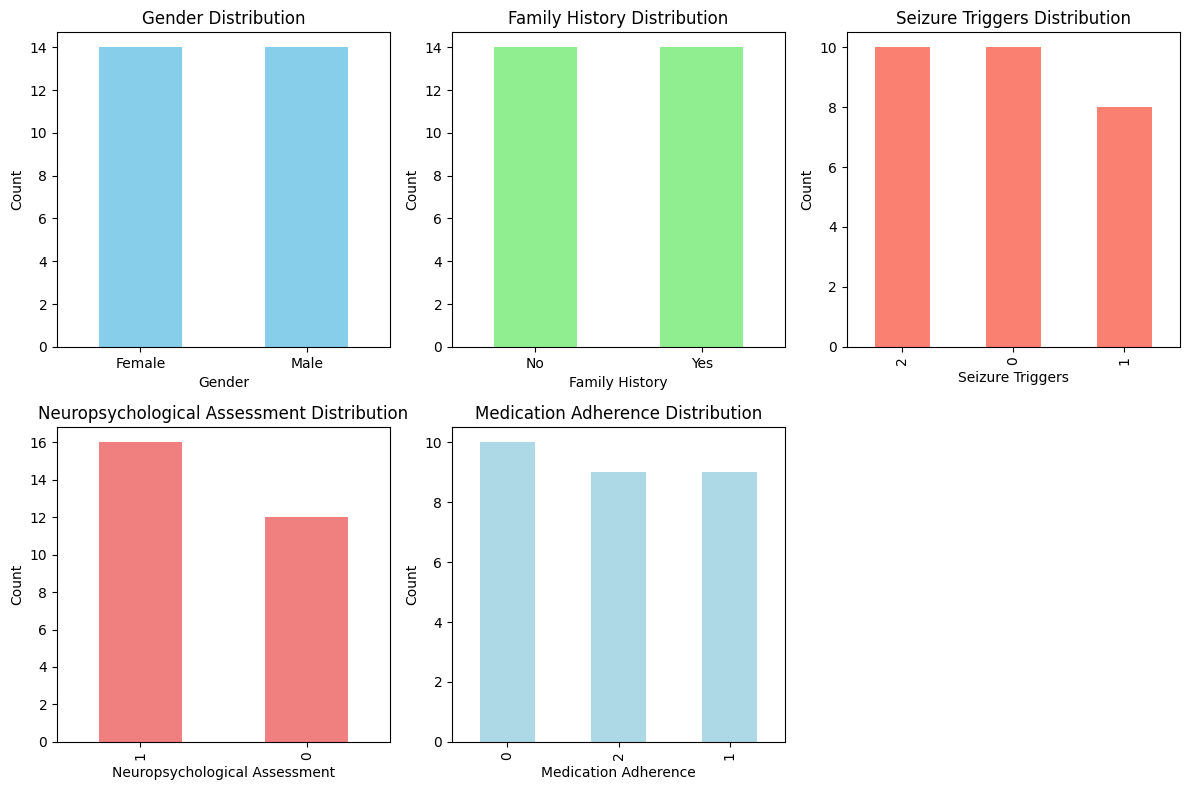

In [27]:
import matplotlib.pyplot as plt

# Plot categorical variables
plt.figure(figsize=(12, 8))

# Plot gender distribution
plt.subplot(2, 3, 1)
data['gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)

# Plot family history distribution
plt.subplot(2, 3, 2)
data['family_history'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Family History Distribution')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)

# Plot seizure triggers distribution
plt.subplot(2, 3, 3)
data['seizure_triggers'].value_counts().plot(kind='bar', color='salmon')
plt.title('Seizure Triggers Distribution')
plt.xlabel('Seizure Triggers')
plt.ylabel('Count')
# You can set custom tick labels if needed
# plt.xticks([0, 1, 2], ['Label 1', 'Label 2', 'Label 3'], rotation=0)

# Plot neuropsychological assessment distribution
plt.subplot(2, 3, 4)
data['neuropsychological_assessment'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Neuropsychological Assessment Distribution')
plt.xlabel('Neuropsychological Assessment')
plt.ylabel('Count')

# Plot medication adherence distribution
plt.subplot(2, 3, 5)
data['medication_adherence'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Medication Adherence Distribution')
plt.xlabel('Medication Adherence')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# EEG pre-processing

In [28]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# Load pre-trained ResNet50 model (without classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [30]:
from skimage.transform import resize  

In [31]:
# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [32]:
#Define a new model with output from intermediate layers of ResNet50
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('conv5_block3_out').output)

In [33]:
# Define function to extract features from EEG data using transfer learning
def extract_features_with_transfer_learning(data):
    num_subjects, num_samples, img_height, img_width, num_channels = data.shape
    
    features = []
    for i in range(num_subjects):
        subject_features = []
        for j in range(num_samples):
            # Reshape EEG data for compatibility with ResNet50 input shape
            data_resized = np.zeros((img_height, img_width, num_channels))
            for k in range(num_channels):
                data_resized[..., k] = resize(data[i, j, ..., k], (img_height, img_width))
            
            # Normalize EEG data
            data_rescaled = data_resized / 255.0
            
            # Extract features from EEG data using pre-trained ResNet50 model
            eeg_features = feature_extractor.predict(np.expand_dims(data_rescaled, axis=0))
            
            subject_features.append(eeg_features)
        features.append(subject_features)
    
    return np.array(features)

In [34]:
# Extract features from positive EEG data using transfer learning
positive_features = extract_features_with_transfer_learning(positive_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [35]:
# Extract features from negative EEG data using transfer learning
negative_features = extract_features_with_transfer_learning(negative_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [36]:
print("Shape of positive features:", positive_features.shape)
print("Shape of negative features:", negative_features.shape)

Shape of positive features: (14, 20, 1, 7, 7, 2048)
Shape of negative features: (14, 20, 1, 7, 7, 2048)


In [37]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, TimeDistributed, Flatten

# Load pre-trained ResNet50 model (without classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Define a new model with output from intermediate layers of ResNet50
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('conv5_block3_out').output)

# Define function to extract features from EEG data using transfer learning and stacked LSTM
def extract_features_with_lstm(data):
    num_subjects, num_samples, img_height, img_width, num_channels = data.shape
    
    lstm_units = 64  # Adjust this as needed
    
    # Define a new model with LSTM layers added after convolutional layers
    lstm_input = Input(shape=(num_samples, img_height, img_width, num_channels), name='lstm_input')
    x = TimeDistributed(feature_extractor)(lstm_input)  # Apply feature extractor to each time step
    x = TimeDistributed(Flatten())(x)  # Flatten output for LSTM
    x = LSTM(lstm_units, return_sequences=True)(x)  # Stacked LSTM layers to capture long-term dependencies
    x = LSTM(lstm_units)(x)
    
    # Create the model
    model = Model(inputs=lstm_input, outputs=x)
    
    return model

# Example usage:
positive_features_model = extract_features_with_lstm(positive_data)
negative_features_model = extract_features_with_lstm(negative_data)


In [38]:
print(positive_features_model)
print(negative_features_model)

<Functional name=functional_2, built=True>
<Functional name=functional_3, built=True>


In [39]:
# Example usage:
positive_features = positive_features_model.predict(positive_data)
negative_features = negative_features_model.predict(negative_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 58s 58s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 55s 55s/step


In [40]:
print(positive_features.shape)
print(negative_features.shape)

(14, 64)
(14, 64)


C:\Users\samar\AppData\Local\Temp\ipykernel_1440\3256177979.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


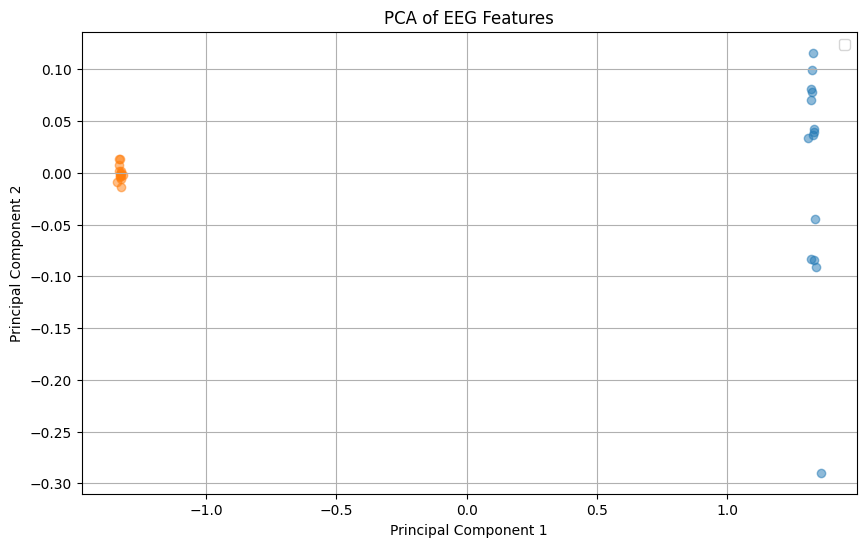

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Combine positive and negative features
combined_features = np.concatenate([positive_features.reshape(-1, positive_features.shape[-1]), 
                                    negative_features.reshape(-1, negative_features.shape[-1])], axis=0)

# Flatten the features for PCA
flattened_features = combined_features.reshape(combined_features.shape[0], -1)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(flattened_features)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:positive_features.size // positive_features.shape[-1], 0], 
            pca_result[:positive_features.size // positive_features.shape[-1], 1], alpha=0.5)
plt.scatter(pca_result[positive_features.size // positive_features.shape[-1]:, 0], 
            pca_result[positive_features.size // positive_features.shape[-1]:, 1], 
             alpha=0.5)
plt.title('PCA of EEG Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# MRI PREPROCESSING

In [42]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D

# Load pre-trained ResNet50 model (without classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



In [43]:
positive_mri_data.shape

(10, 224, 224, 3)

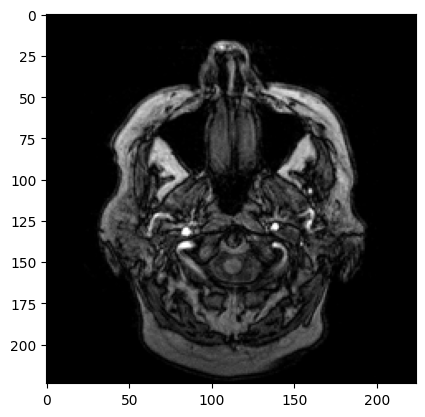

In [44]:
import matplotlib.pyplot as plt
plt.imshow(positive_mri_data[0])

In [45]:
import numpy as np
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define function to extract features for one subject using ResNet50
def extract_features_mri_single_subject(data):
    subject_features = []
    for image_data in data:
        # Preprocess MRI image
        img = image.array_to_img(image_data)
        img = img.resize((224, 224))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        # Extract features using pre-trained ResNet50 model
        img_features = base_model.predict(img)
        subject_features.append(img_features.flatten())
    return np.array(subject_features)

# Extract features from positive MRI data for one subject using ResNet50
positive_mri_features_single_subject = extract_features_mri_single_subject(positive_mri_data)

# Extract features from negative MRI data for one subject using ResNet50
negative_mri_features_single_subject = extract_features_mri_single_subject(negative_mri_data)

# Repeat features for all subjects
positive_mri_features_all_subjects = np.array([positive_mri_features_single_subject] * 14)
negative_mri_features_all_subjects = np.array([negative_mri_features_single_subject] * 14)

# Shape of features for all subjects
print("Positive MRI Features Shape:", positive_mri_features_all_subjects.shape)
print("Negative MRI Features Shape:", negative_mri_features_all_subjects.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Positive MRI Features Shape: (14, 10, 100352)
Negative MRI Features Shape: (14, 10, 100352)


c:\Users\samar\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\samar\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


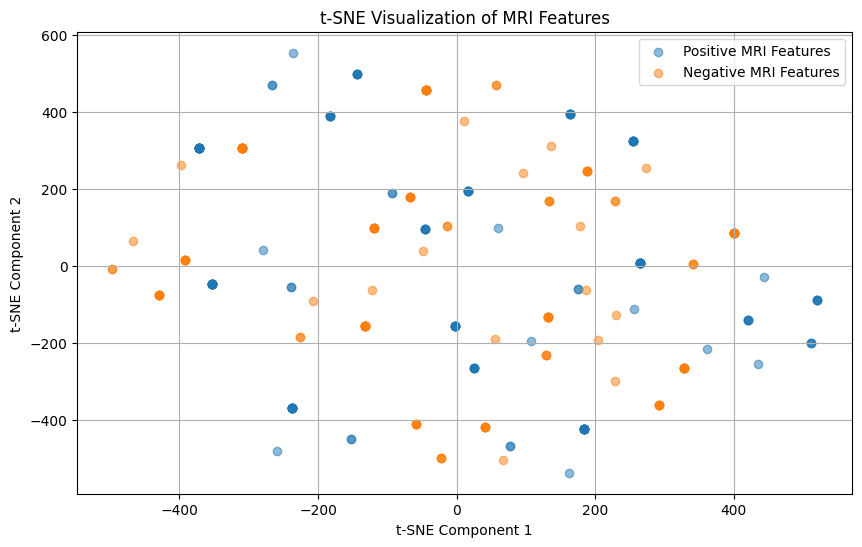

In [46]:
from sklearn.manifold import TSNE

# Initialize t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform positive MRI features
positive_mri_features_tsne = tsne.fit_transform(positive_mri_features_all_subjects.reshape(-1, positive_mri_features_all_subjects.shape[-1]))

# Fit and transform negative MRI features
negative_mri_features_tsne = tsne.fit_transform(negative_mri_features_all_subjects.reshape(-1, negative_mri_features_all_subjects.shape[-1]))

# Plot t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(positive_mri_features_tsne[:, 0], positive_mri_features_tsne[:, 1], label='Positive MRI Features', alpha=0.5)
plt.scatter(negative_mri_features_tsne[:, 0], negative_mri_features_tsne[:, 1], label='Negative MRI Features', alpha=0.5)
plt.title('t-SNE Visualization of MRI Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
! pip install umap

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3552 sha256=ed3a5509b46d4f6ce5a5cb8584cdc75c0959508c000afff11c93ec9d72ad1e82
  Stored in directory: c:\users\samar\appdata\local\pip\cache\wheels\15\f1\28\53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


c:\Users\samar\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\samar\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


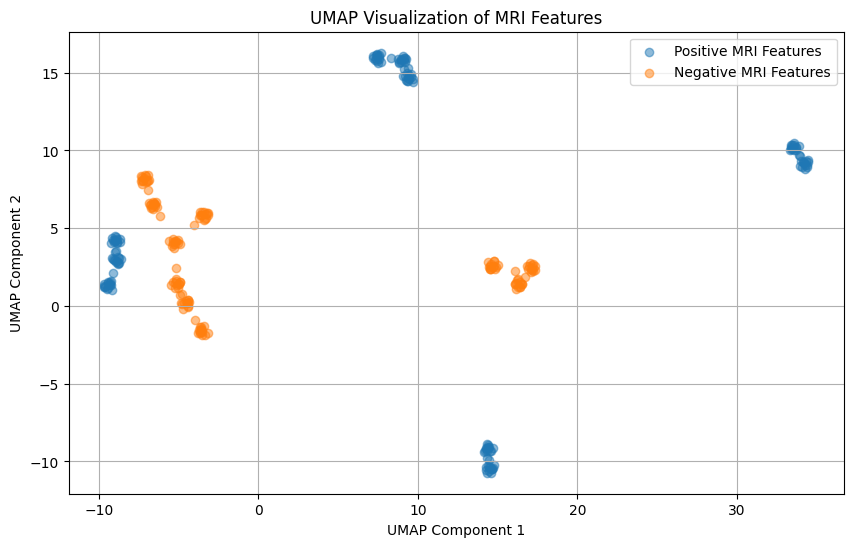

In [49]:
import umap.umap_ as umap

# Initialize UMAP model
umap_model = umap.UMAP(n_components=2, random_state=42)

# Fit and transform positive MRI features
positive_mri_features_umap = umap_model.fit_transform(positive_mri_features_all_subjects.reshape(-1, positive_mri_features_all_subjects.shape[-1]))

# Fit and transform negative MRI features
negative_mri_features_umap = umap_model.fit_transform(negative_mri_features_all_subjects.reshape(-1, negative_mri_features_all_subjects.shape[-1]))

# Plot UMAP results
plt.figure(figsize=(10, 6))
plt.scatter(positive_mri_features_umap[:, 0], positive_mri_features_umap[:, 1], label='Positive MRI Features', alpha=0.5)
plt.scatter(negative_mri_features_umap[:, 0], negative_mri_features_umap[:, 1], label='Negative MRI Features', alpha=0.5)
plt.title('UMAP Visualization of MRI Features')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(positive_mri_features_all_subjects.shape[2],)),  # Reduce the input dimension to 128
    Dense(64, activation='relu'),
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for regression

# Train the model
history = model.fit(positive_mri_features_all_subjects.reshape(-1, positive_mri_features_all_subjects.shape[-1]), 
                    np.zeros((positive_mri_features_all_subjects.shape[0]*positive_mri_features_all_subjects.shape[1], 64)),  # Adjust the target shape to (64,)
                    epochs=10,  # Adjust as needed
                    batch_size=32, 
                    validation_split=0.2)  # 20% validation split, adjust as needed

# Get the reduced features
reduced_positive_mri_features = model.predict(positive_mri_features_all_subjects.reshape(-1, positive_mri_features_all_subjects.shape[-1]))
reduced_negative_mri_features = model.predict(negative_mri_features_all_subjects.reshape(-1, negative_mri_features_all_subjects.shape[-1]))

# Reshape the reduced features to (28, 64)
reduced_positive_mri_features = reduced_positive_mri_features.reshape(positive_mri_features_all_subjects.shape[0], -1, 64)
reduced_negative_mri_features = reduced_negative_mri_features.reshape(negative_mri_features_all_subjects.shape[0], -1, 64)

# Print the shape of reduced features
print("Shape of reduced positive MRI features:", reduced_positive_mri_features.shape)
print("Shape of reduced negative MRI features:", reduced_negative_mri_features.shape)


c:\Users\samar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 347ms/step - loss: 21.1671 - val_loss: 7.3988
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step - loss: 7.5014 - val_loss: 6.6787
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - loss: 5.0078 - val_loss: 2.3069
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - loss: 1.7631 - val_loss: 0.4390
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - loss: 0.4058 - val_loss: 0.1819
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - loss: 0.1233 - val_loss: 0.0211
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - loss: 0.0197 - val_loss: 0.0080
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - loss: 0.0090 - val_loss: 0.0048
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - loss: 0.0033 - val_loss: 1.2911e-04
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - loss: 3.0830e-04 - val_loss: 4.9381e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Shape of reduced positive MRI features: (14, 10, 64)
Shape of reduced 

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(positive_mri_features_all_subjects.shape[2],)),  # Reduce the input dimension to 128
    Dense(64, activation='relu'),  # Output layer of size 64
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for regression

# Train the model
history = model.fit(positive_mri_features_all_subjects.reshape(-1, positive_mri_features_all_subjects.shape[-1]), 
                    np.zeros((positive_mri_features_all_subjects.shape[0]*positive_mri_features_all_subjects.shape[1], 64)),  # Adjust the target shape
                    epochs=10,  # Adjust as needed
                    batch_size=32, 
                    validation_split=0.2)  # 20% validation split, adjust as needed

# Get the reduced features
reduced_positive_mri_features = model.predict(positive_mri_features_all_subjects.reshape(-1, positive_mri_features_all_subjects.shape[-1]))

# Reshape the reduced features to (28, 64)
reduced_positive_mri_features = reduced_positive_mri_features.reshape(positive_mri_features_all_subjects.shape[0], -1, 64)

# Print the shape of reduced features
print("Shape of reduced positive MRI features:", reduced_positive_mri_features.shape)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 461ms/step - loss: 36.3983 - val_loss: 11.8825
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - loss: 11.6792 - val_loss: 5.6543
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - loss: 4.5934 - val_loss: 1.7540
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - loss: 1.5469 - val_loss: 0.7202
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - loss: 0.6591 - val_loss: 0.3237
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - loss: 0.2640 - val_loss: 0.0905
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - loss: 0.0848 - val_loss: 0.0296
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - loss: 0.0214 - val_loss: 2.9130e-04
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - loss: 1.2402e-04 - val_loss: 2.0093e-07
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - loss: 9.0668e-08 - val_loss: 0.0000e+00
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Shape of reduced positive MRI features: (14, 10, 64)


# multimodality model

In [53]:
# eeg_features.shape

In [54]:
# Concatenate MRI features for positive and negative instances
mri_features = np.concatenate([reduced_positive_mri_features,reduced_negative_mri_features], axis=0)

mri_features.shape

(28, 10, 64)

In [55]:
data.shape,label.shape

((28, 6), (28,))